In [1]:
import argparse
import sys
sys.path.append('./dataprocesser')
from synthrad_conversion.utils.my_configs_yacs import init_cfg
from dataprocesser.step1_init_data_list import init_dataset
import dataprocesser
from dataprocesser.dataset_registry import DATASET_REGISTRY

for dataset_type in DATASET_REGISTRY:
    print(dataset_type)


C:\Users\zy7\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


anish
anish_seg
multimodal_csv
multimodal_prior_csv
combined_simplified_csv_seg_assigned
combined_simplified_csv_seg_without_assigned_loader
combined_simplified_csv_seg_mr_loader
mr2ct_simplified_csv
xcat_ct_simplified_csv
synthetic_ct_simplified_csv
synthrad_mr2ct
synthrad_seg
combined
combined_assigned
csv_slice
csv_slice_assigned
json_slice


Infer_ddpm2d_seg2med_multimodal
create combined segmentation dataset with assigned value
create base dataset
combined segmentation assigned dataset use keys: ['source', 'target']
use train csv: tutorial2_train_prior.csv
use test csv: tutorial2_val_prior_1.csv
use keys for creating volume dataset:  ['source', 'target']
model name:  ddpm2d_seg2med_multimodal
val_use_patch:  False
527
4
original image shape: torch.Size([1, 1, 512, 512, 39])
original image min and max: 0.0 1.0
original image modality: tensor([4])


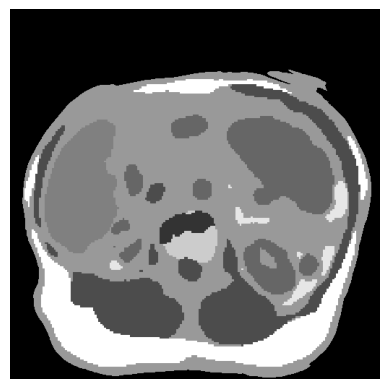

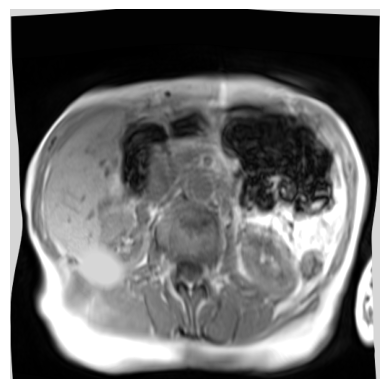

In [9]:
import numpy as np
from synthrad_conversion.utils.my_configs_yacs import init_cfg
from dataprocesser.step1_init_data_list import init_dataset
config_path = 'tutorial2_config_prior.yaml'
opt=init_cfg(config_path)
model_name_path='Infer_'+opt.model_name + opt.name_prefix
print(model_name_path)
dataset_name = 'multimodal_prior_csv'
loader, opt, my_paths = init_dataset(opt, model_name_path, dataset_name)

train_ds = loader.train_ds
val_ds  = loader.val_ds
print(len(train_ds))
print(len(val_ds))

train_loader = loader.train_loader
val_loader  = loader.val_loader
first_batch = next(iter(val_loader))
first_input = first_batch[opt.dataset.indicator_A]
first_target = first_batch[opt.dataset.indicator_B]
print("original image shape:", first_target.shape)
print("original image min and max:", np.min(first_target), np.max(first_target))
print("original image modality:", first_batch['modality'])


# visualize a slice:
import matplotlib.pyplot as plt
import numpy as np
def plottorchdata(data, i, slice_id):
    data = data.cpu().numpy().squeeze().squeeze()
    dataimg = f'tutorial_{i}.png'
    plt.figure(i)
    plt.imshow(data[..., slice_id].T, cmap='gray')
    plt.axis('off')
    plt.show()
    
    #plt.savefig(dataimg)
slice_id = 10
plottorchdata(first_input, 0, slice_id)
plottorchdata(first_target, 1, slice_id)

In [2]:
import synthrad_conversion.networks as networks
from synthrad_conversion.networks.model_registry import MODEL_REGISTRY
for model in MODEL_REGISTRY:
    print(model)

ddpm2d_seg2med
ddpm2d_seg2med_multimodal
spade_ddpm2d_seg2med
pix2pix
cycle_gan
AttentionUnet
resUnet


In [1]:
from synthrad_conversion import train
train.run(config='tutorial2_config_prior.yaml', dataset_name = 'multimodal_prior_csv')

C:\Users\zy7\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


create combined segmentation dataset with assigned value
create base dataset
combined segmentation assigned dataset use keys: ['source', 'target']
use train csv: tutorial2_train_prior.csv
use test csv: tutorial2_val_prior_1.csv
use keys for creating volume dataset:  ['source', 'target']
model name:  ddpm2d_seg2med_multimodal
val_use_patch:  False
given GPU IDs:  [1]
use GPU:  NVIDIA RTX A6000
no valid checkpoint as input, start new training
early stopping criterion on, set patience as 10, convergence rate as 0.1%
original image shape: torch.Size([1, 1, 512, 512, 149])
training: [1/527] Processing volume...

 first input volume shape: torch.Size([1, 512, 512, 149])
first target volume shape: torch.Size([1, 512, 512, 149])
first patient ID: 1PA004
first ad: tensor(0)
first modality: tensor(0)

 input shape: torch.Size([1, 512, 512, 149])
sources, min,max,mean,std:  metatensor(0.) metatensor(1.) metatensor(0.0686) metatensor(0.1514)
targets, min,max,mean,std:  metatensor(0.) metatensor(1.

100%|██████████| 500/500 [00:41<00:00, 12.00it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


training: [35/527] Processing volume...
training: [36/527] Processing volume...
training: [37/527] Processing volume...
training: [38/527] Processing volume...
training: [39/527] Processing volume...
training: [40/527] Processing volume...
training: [41/527] Processing volume...
training: [42/527] Processing volume...
training: [43/527] Processing volume...
training: [44/527] Processing volume...
training: [45/527] Processing volume...
training: [46/527] Processing volume...
training: [47/527] Processing volume...
training: [48/527] Processing volume...
training: [49/527] Processing volume...
training: [50/527] Processing volume...
training: [51/527] Processing volume...
training: [52/527] Processing volume...
training: [53/527] Processing volume...
training: [54/527] Processing volume...
training: [55/527] Processing volume...
training: [56/527] Processing volume...
training: [57/527] Processing volume...
training: [58/527] Processing volume...
training: [59/527] Processing volume...


100%|██████████| 500/500 [00:41<00:00, 11.99it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [68/527] Processing volume...
training: [69/527] Processing volume...
training: [70/527] Processing volume...
training: [71/527] Processing volume...
training: [72/527] Processing volume...
training: [73/527] Processing volume...
training: [74/527] Processing volume...
training: [75/527] Processing volume...
training: [76/527] Processing volume...
training: [77/527] Processing volume...
training: [78/527] Processing volume...
training: [79/527] Processing volume...
training: [80/527] Processing volume...
training: [81/527] Processing volume...
training: [82/527] Processing volume...
training: [83/527] Processing volume...
training: [84/527] Processing volume...
training: [85/527] Processing volume...
training: [86/527] Processing volume...
training: [87/527] Processing volume...
training: [88/527] Processing volume...
training: [89/527] Processing volume...
training: [90/527] Processing volume...
training: [91/527] Processing volume...
training: [92/527] Processing volume...


100%|██████████| 500/500 [00:41<00:00, 11.99it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [102/527] Processing volume...
training: [103/527] Processing volume...
training: [104/527] Processing volume...
training: [105/527] Processing volume...
training: [106/527] Processing volume...
training: [107/527] Processing volume...
training: [108/527] Processing volume...
training: [109/527] Processing volume...
training: [110/527] Processing volume...
training: [111/527] Processing volume...
training: [112/527] Processing volume...
training: [113/527] Processing volume...
training: [114/527] Processing volume...
training: [115/527] Processing volume...
training: [116/527] Processing volume...
training: [117/527] Processing volume...
training: [118/527] Processing volume...
training: [119/527] Processing volume...
training: [120/527] Processing volume...
training: [121/527] Processing volume...
training: [122/527] Processing volume...
training: [123/527] Processing volume...
training: [124/527] Processing volume...
training: [125/527] Processing volume...
training: [126/5

100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [136/527] Processing volume...
training: [137/527] Processing volume...
training: [138/527] Processing volume...
training: [139/527] Processing volume...
training: [140/527] Processing volume...
training: [141/527] Processing volume...
training: [142/527] Processing volume...
training: [143/527] Processing volume...
training: [144/527] Processing volume...
training: [145/527] Processing volume...
training: [146/527] Processing volume...
training: [147/527] Processing volume...
training: [148/527] Processing volume...
training: [149/527] Processing volume...
training: [150/527] Processing volume...
training: [151/527] Processing volume...
training: [152/527] Processing volume...
training: [153/527] Processing volume...
training: [154/527] Processing volume...
training: [155/527] Processing volume...
training: [156/527] Processing volume...
training: [157/527] Processing volume...
training: [158/527] Processing volume...
training: [159/527] Processing volume...
training: [160/5

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


training: [168/527] Processing volume...
training: [169/527] Processing volume...
training: [170/527] Processing volume...
training: [171/527] Processing volume...
training: [172/527] Processing volume...
training: [173/527] Processing volume...
training: [174/527] Processing volume...
training: [175/527] Processing volume...
training: [176/527] Processing volume...
training: [177/527] Processing volume...
training: [178/527] Processing volume...
training: [179/527] Processing volume...
training: [180/527] Processing volume...
training: [181/527] Processing volume...
training: [182/527] Processing volume...
training: [183/527] Processing volume...
training: [184/527] Processing volume...
training: [185/527] Processing volume...
training: [186/527] Processing volume...
training: [187/527] Processing volume...
training: [188/527] Processing volume...
training: [189/527] Processing volume...
training: [190/527] Processing volume...
training: [191/527] Processing volume...
training: [192/5

100%|██████████| 500/500 [00:41<00:00, 11.99it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [199/527] Processing volume...
training: [200/527] Processing volume...
training: [201/527] Processing volume...
training: [202/527] Processing volume...
training: [203/527] Processing volume...
training: [204/527] Processing volume...
training: [205/527] Processing volume...
training: [206/527] Processing volume...
training: [207/527] Processing volume...
training: [208/527] Processing volume...
training: [209/527] Processing volume...
training: [210/527] Processing volume...
training: [211/527] Processing volume...
training: [212/527] Processing volume...
training: [213/527] Processing volume...
training: [214/527] Processing volume...
training: [215/527] Processing volume...
training: [216/527] Processing volume...
training: [217/527] Processing volume...
training: [218/527] Processing volume...
training: [219/527] Processing volume...
training: [220/527] Processing volume...
training: [221/527] Processing volume...
training: [222/527] Processing volume...
training: [223/5

100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [229/527] Processing volume...
training: [230/527] Processing volume...
training: [231/527] Processing volume...
training: [232/527] Processing volume...
training: [233/527] Processing volume...
training: [234/527] Processing volume...
training: [235/527] Processing volume...
training: [236/527] Processing volume...
training: [237/527] Processing volume...
training: [238/527] Processing volume...
training: [239/527] Processing volume...
training: [240/527] Processing volume...
training: [241/527] Processing volume...
training: [242/527] Processing volume...
training: [243/527] Processing volume...
training: [244/527] Processing volume...
training: [245/527] Processing volume...
training: [246/527] Processing volume...
training: [247/527] Processing volume...
training: [248/527] Processing volume...
training: [249/527] Processing volume...
training: [250/527] Processing volume...
training: [251/527] Processing volume...
training: [252/527] Processing volume...
training: [253/5

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.93it/s]


training: [268/527] Processing volume...
training: [269/527] Processing volume...
training: [270/527] Processing volume...
training: [271/527] Processing volume...
training: [272/527] Processing volume...
training: [273/527] Processing volume...
training: [274/527] Processing volume...
training: [275/527] Processing volume...
training: [276/527] Processing volume...
training: [277/527] Processing volume...
training: [278/527] Processing volume...
training: [279/527] Processing volume...
training: [280/527] Processing volume...
training: [281/527] Processing volume...
training: [282/527] Processing volume...
training: [283/527] Processing volume...
training: [284/527] Processing volume...
training: [285/527] Processing volume...
training: [286/527] Processing volume...
training: [287/527] Processing volume...
training: [288/527] Processing volume...
training: [289/527] Processing volume...
training: [290/527] Processing volume...
training: [291/527] Processing volume...
training: [292/5

100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


training: [318/527] Processing volume...
training: [319/527] Processing volume...
training: [320/527] Processing volume...
training: [321/527] Processing volume...
training: [322/527] Processing volume...
training: [323/527] Processing volume...
training: [324/527] Processing volume...
training: [325/527] Processing volume...
training: [326/527] Processing volume...
training: [327/527] Processing volume...
training: [328/527] Processing volume...
training: [329/527] Processing volume...
training: [330/527] Processing volume...
training: [331/527] Processing volume...
training: [332/527] Processing volume...
training: [333/527] Processing volume...
training: [334/527] Processing volume...
training: [335/527] Processing volume...
training: [336/527] Processing volume...
training: [337/527] Processing volume...
training: [338/527] Processing volume...
training: [339/527] Processing volume...
training: [340/527] Processing volume...
training: [341/527] Processing volume...
training: [342/5

100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [376/527] Processing volume...
training: [377/527] Processing volume...
training: [378/527] Processing volume...
training: [379/527] Processing volume...
training: [380/527] Processing volume...
training: [381/527] Processing volume...
training: [382/527] Processing volume...
training: [383/527] Processing volume...
training: [384/527] Processing volume...
training: [385/527] Processing volume...
training: [386/527] Processing volume...
training: [387/527] Processing volume...
training: [388/527] Processing volume...
training: [389/527] Processing volume...
training: [390/527] Processing volume...
training: [391/527] Processing volume...
training: [392/527] Processing volume...
training: [393/527] Processing volume...
training: [394/527] Processing volume...
training: [395/527] Processing volume...
training: [396/527] Processing volume...
training: [397/527] Processing volume...
training: [398/527] Processing volume...
training: [399/527] Processing volume...
training: [400/5

100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [409/527] Processing volume...
training: [410/527] Processing volume...
training: [411/527] Processing volume...
training: [412/527] Processing volume...
training: [413/527] Processing volume...
training: [414/527] Processing volume...
training: [415/527] Processing volume...
training: [416/527] Processing volume...
training: [417/527] Processing volume...
training: [418/527] Processing volume...
training: [419/527] Processing volume...
training: [420/527] Processing volume...
training: [421/527] Processing volume...
training: [422/527] Processing volume...
training: [423/527] Processing volume...
training: [424/527] Processing volume...
training: [425/527] Processing volume...
training: [426/527] Processing volume...
validation step in training epoch 1
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [427/527] Processing volume...
training: [428/527] Processing volume...
training: [429/527] Processing volume...
training: [430/527] Processing volume...
training: [431/527] Processing volume...
training: [432/527] Processing volume...
training: [433/527] Processing volume...
training: [434/527] Processing volume...
training: [435/527] Processing volume...
training: [436/527] Processing volume...
training: [437/527] Processing volume...
training: [438/527] Processing volume...
training: [439/527] Processing volume...
training: [440/527] Processing volume...
training: [441/527] Processing volume...
training: [442/527] Processing volume...
training: [443/527] Processing volume...
training: [444/527] Processing volume...
validation step in training epoch 1
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [445/527] Processing volume...
training: [446/527] Processing volume...
training: [447/527] Processing volume...
training: [448/527] Processing volume...
training: [449/527] Processing volume...
training: [450/527] Processing volume...
training: [451/527] Processing volume...
training: [452/527] Processing volume...
training: [453/527] Processing volume...
training: [454/527] Processing volume...
training: [455/527] Processing volume...
training: [456/527] Processing volume...
training: [457/527] Processing volume...
training: [458/527] Processing volume...
training: [459/527] Processing volume...
training: [460/527] Processing volume...
training: [461/527] Processing volume...
training: [462/527] Processing volume...
validation step in training epoch 1
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


training: [463/527] Processing volume...
training: [464/527] Processing volume...
training: [465/527] Processing volume...
training: [466/527] Processing volume...
training: [467/527] Processing volume...
training: [468/527] Processing volume...
training: [469/527] Processing volume...
training: [470/527] Processing volume...
training: [471/527] Processing volume...
training: [472/527] Processing volume...
training: [473/527] Processing volume...
training: [474/527] Processing volume...
training: [475/527] Processing volume...
training: [476/527] Processing volume...
training: [477/527] Processing volume...
training: [478/527] Processing volume...
training: [479/527] Processing volume...
training: [480/527] Processing volume...
validation step in training epoch 1
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [481/527] Processing volume...
training: [482/527] Processing volume...
training: [483/527] Processing volume...
training: [484/527] Processing volume...
training: [485/527] Processing volume...
training: [486/527] Processing volume...
training: [487/527] Processing volume...
training: [488/527] Processing volume...
training: [489/527] Processing volume...
training: [490/527] Processing volume...
training: [491/527] Processing volume...
training: [492/527] Processing volume...
training: [493/527] Processing volume...
training: [494/527] Processing volume...
training: [495/527] Processing volume...
training: [496/527] Processing volume...
training: [497/527] Processing volume...
validation step in training epoch 1
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume shape: torch.Size([1, 512, 512, 89])
targe

100%|██████████| 500/500 [00:41<00:00, 11.99it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [498/527] Processing volume...
training: [499/527] Processing volume...
training: [500/527] Processing volume...
training: [501/527] Processing volume...
training: [502/527] Processing volume...
training: [503/527] Processing volume...
training: [504/527] Processing volume...
training: [505/527] Processing volume...
training: [506/527] Processing volume...
training: [507/527] Processing volume...
training: [508/527] Processing volume...
training: [509/527] Processing volume...
training: [510/527] Processing volume...
training: [511/527] Processing volume...
training: [512/527] Processing volume...
training: [513/527] Processing volume...
training: [514/527] Processing volume...
training: [515/527] Processing volume...
validation step in training epoch 1
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [516/527] Processing volume...
training: [517/527] Processing volume...
training: [518/527] Processing volume...
training: [519/527] Processing volume...
training: [520/527] Processing volume...
training: [521/527] Processing volume...
training: [522/527] Processing volume...
training: [523/527] Processing volume...
training: [524/527] Processing volume...
training: [525/527] Processing volume...
training: [526/527] Processing volume...
training: [527/527] Processing volume...
validation step in training epoch 1
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume shape: torch.Size([1, 512, 512, 89])
target volume shape: torch.Size([1, 512, 512, 89])
ad: tensor(0)
modality: tensor(2)


100%|██████████| 500/500 [00:41<00:00, 12.00it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.93it/s]


original image shape: torch.Size([1, 1, 512, 512, 149])
training: [1/527] Processing volume...
training: [2/527] Processing volume...
training: [3/527] Processing volume...
training: [4/527] Processing volume...
training: [5/527] Processing volume...
training: [6/527] Processing volume...
training: [7/527] Processing volume...
training: [8/527] Processing volume...
training: [9/527] Processing volume...
training: [10/527] Processing volume...
training: [11/527] Processing volume...
validation step in training epoch 2
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume shape: torch.Size([1, 512, 512, 89])
target volume shape: torch.Size([1, 512, 512, 89])
ad: tensor(0)
modality: tensor(2)


100%|██████████| 500/500 [00:41<00:00, 12.01it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


training: [12/527] Processing volume...
training: [13/527] Processing volume...
training: [14/527] Processing volume...
training: [15/527] Processing volume...
training: [16/527] Processing volume...
training: [17/527] Processing volume...
training: [18/527] Processing volume...
training: [19/527] Processing volume...
training: [20/527] Processing volume...
training: [21/527] Processing volume...
training: [22/527] Processing volume...
training: [23/527] Processing volume...
training: [24/527] Processing volume...
training: [25/527] Processing volume...
training: [26/527] Processing volume...
training: [27/527] Processing volume...
training: [28/527] Processing volume...
training: [29/527] Processing volume...
training: [30/527] Processing volume...
training: [31/527] Processing volume...
training: [32/527] Processing volume...
training: [33/527] Processing volume...
training: [34/527] Processing volume...
training: [35/527] Processing volume...
training: [36/527] Processing volume...


100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


training: [46/527] Processing volume...
training: [47/527] Processing volume...
training: [48/527] Processing volume...
training: [49/527] Processing volume...
training: [50/527] Processing volume...
training: [51/527] Processing volume...
training: [52/527] Processing volume...
training: [53/527] Processing volume...
training: [54/527] Processing volume...
training: [55/527] Processing volume...
training: [56/527] Processing volume...
training: [57/527] Processing volume...
training: [58/527] Processing volume...
training: [59/527] Processing volume...
training: [60/527] Processing volume...
training: [61/527] Processing volume...
training: [62/527] Processing volume...
training: [63/527] Processing volume...
training: [64/527] Processing volume...
training: [65/527] Processing volume...
training: [66/527] Processing volume...
training: [67/527] Processing volume...
training: [68/527] Processing volume...
training: [69/527] Processing volume...
training: [70/527] Processing volume...


100%|██████████| 500/500 [00:41<00:00, 11.99it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [79/527] Processing volume...
training: [80/527] Processing volume...
training: [81/527] Processing volume...
training: [82/527] Processing volume...
training: [83/527] Processing volume...
training: [84/527] Processing volume...
training: [85/527] Processing volume...
training: [86/527] Processing volume...
training: [87/527] Processing volume...
training: [88/527] Processing volume...
training: [89/527] Processing volume...
training: [90/527] Processing volume...
training: [91/527] Processing volume...
training: [92/527] Processing volume...
training: [93/527] Processing volume...
training: [94/527] Processing volume...
training: [95/527] Processing volume...
training: [96/527] Processing volume...
training: [97/527] Processing volume...
training: [98/527] Processing volume...
training: [99/527] Processing volume...
training: [100/527] Processing volume...
training: [101/527] Processing volume...
training: [102/527] Processing volume...
training: [103/527] Processing volume

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [113/527] Processing volume...
training: [114/527] Processing volume...
training: [115/527] Processing volume...
training: [116/527] Processing volume...
training: [117/527] Processing volume...
training: [118/527] Processing volume...
training: [119/527] Processing volume...
training: [120/527] Processing volume...
training: [121/527] Processing volume...
training: [122/527] Processing volume...
training: [123/527] Processing volume...
training: [124/527] Processing volume...
training: [125/527] Processing volume...
training: [126/527] Processing volume...
training: [127/527] Processing volume...
training: [128/527] Processing volume...
training: [129/527] Processing volume...
training: [130/527] Processing volume...
training: [131/527] Processing volume...
training: [132/527] Processing volume...
training: [133/527] Processing volume...
training: [134/527] Processing volume...
training: [135/527] Processing volume...
training: [136/527] Processing volume...
training: [137/5

100%|██████████| 500/500 [00:41<00:00, 12.01it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [147/527] Processing volume...
training: [148/527] Processing volume...
training: [149/527] Processing volume...
training: [150/527] Processing volume...
training: [151/527] Processing volume...
training: [152/527] Processing volume...
training: [153/527] Processing volume...
training: [154/527] Processing volume...
training: [155/527] Processing volume...
training: [156/527] Processing volume...
training: [157/527] Processing volume...
training: [158/527] Processing volume...
training: [159/527] Processing volume...
training: [160/527] Processing volume...
training: [161/527] Processing volume...
training: [162/527] Processing volume...
training: [163/527] Processing volume...
training: [164/527] Processing volume...
training: [165/527] Processing volume...
training: [166/527] Processing volume...
training: [167/527] Processing volume...
training: [168/527] Processing volume...
training: [169/527] Processing volume...
training: [170/527] Processing volume...
training: [171/5

100%|██████████| 500/500 [00:41<00:00, 12.01it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


training: [179/527] Processing volume...
training: [180/527] Processing volume...
training: [181/527] Processing volume...
training: [182/527] Processing volume...
training: [183/527] Processing volume...
training: [184/527] Processing volume...
training: [185/527] Processing volume...
training: [186/527] Processing volume...
training: [187/527] Processing volume...
training: [188/527] Processing volume...
training: [189/527] Processing volume...
training: [190/527] Processing volume...
training: [191/527] Processing volume...
training: [192/527] Processing volume...
training: [193/527] Processing volume...
training: [194/527] Processing volume...
training: [195/527] Processing volume...
training: [196/527] Processing volume...
training: [197/527] Processing volume...
training: [198/527] Processing volume...
training: [199/527] Processing volume...
training: [200/527] Processing volume...
training: [201/527] Processing volume...
training: [202/527] Processing volume...
training: [203/5

100%|██████████| 500/500 [00:41<00:00, 12.00it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


training: [208/527] Processing volume...
training: [209/527] Processing volume...
training: [210/527] Processing volume...
training: [211/527] Processing volume...
training: [212/527] Processing volume...
training: [213/527] Processing volume...
training: [214/527] Processing volume...
training: [215/527] Processing volume...
training: [216/527] Processing volume...
training: [217/527] Processing volume...
training: [218/527] Processing volume...
training: [219/527] Processing volume...
training: [220/527] Processing volume...
training: [221/527] Processing volume...
training: [222/527] Processing volume...
training: [223/527] Processing volume...
training: [224/527] Processing volume...
training: [225/527] Processing volume...
training: [226/527] Processing volume...
training: [227/527] Processing volume...
training: [228/527] Processing volume...
training: [229/527] Processing volume...
training: [230/527] Processing volume...
training: [231/527] Processing volume...
training: [232/5

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [239/527] Processing volume...
training: [240/527] Processing volume...
training: [241/527] Processing volume...
training: [242/527] Processing volume...
training: [243/527] Processing volume...
training: [244/527] Processing volume...
training: [245/527] Processing volume...
training: [246/527] Processing volume...
training: [247/527] Processing volume...
training: [248/527] Processing volume...
training: [249/527] Processing volume...
training: [250/527] Processing volume...
training: [251/527] Processing volume...
training: [252/527] Processing volume...
training: [253/527] Processing volume...
training: [254/527] Processing volume...
training: [255/527] Processing volume...
training: [256/527] Processing volume...
training: [257/527] Processing volume...
training: [258/527] Processing volume...
training: [259/527] Processing volume...
training: [260/527] Processing volume...
training: [261/527] Processing volume...
training: [262/527] Processing volume...
training: [263/5

100%|██████████| 500/500 [00:41<00:00, 12.01it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [282/527] Processing volume...
training: [283/527] Processing volume...
training: [284/527] Processing volume...
training: [285/527] Processing volume...
training: [286/527] Processing volume...
training: [287/527] Processing volume...
training: [288/527] Processing volume...
training: [289/527] Processing volume...
training: [290/527] Processing volume...
training: [291/527] Processing volume...
training: [292/527] Processing volume...
training: [293/527] Processing volume...
training: [294/527] Processing volume...
training: [295/527] Processing volume...
training: [296/527] Processing volume...
training: [297/527] Processing volume...
training: [298/527] Processing volume...
training: [299/527] Processing volume...
training: [300/527] Processing volume...
training: [301/527] Processing volume...
training: [302/527] Processing volume...
training: [303/527] Processing volume...
training: [304/527] Processing volume...
training: [305/527] Processing volume...
training: [306/5

100%|██████████| 500/500 [00:41<00:00, 11.99it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [336/527] Processing volume...
training: [337/527] Processing volume...
training: [338/527] Processing volume...
training: [339/527] Processing volume...
training: [340/527] Processing volume...
training: [341/527] Processing volume...
training: [342/527] Processing volume...
training: [343/527] Processing volume...
training: [344/527] Processing volume...
training: [345/527] Processing volume...
training: [346/527] Processing volume...
training: [347/527] Processing volume...
training: [348/527] Processing volume...
training: [349/527] Processing volume...
training: [350/527] Processing volume...
training: [351/527] Processing volume...
training: [352/527] Processing volume...
training: [353/527] Processing volume...
training: [354/527] Processing volume...
training: [355/527] Processing volume...
training: [356/527] Processing volume...
training: [357/527] Processing volume...
training: [358/527] Processing volume...
training: [359/527] Processing volume...
training: [360/5

100%|██████████| 500/500 [00:41<00:00, 11.99it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [394/527] Processing volume...
training: [395/527] Processing volume...
training: [396/527] Processing volume...
training: [397/527] Processing volume...
training: [398/527] Processing volume...
training: [399/527] Processing volume...
training: [400/527] Processing volume...
training: [401/527] Processing volume...
training: [402/527] Processing volume...
training: [403/527] Processing volume...
training: [404/527] Processing volume...
training: [405/527] Processing volume...
training: [406/527] Processing volume...
training: [407/527] Processing volume...
training: [408/527] Processing volume...
training: [409/527] Processing volume...
training: [410/527] Processing volume...
training: [411/527] Processing volume...
training: [412/527] Processing volume...
training: [413/527] Processing volume...
training: [414/527] Processing volume...
validation step in training epoch 2
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 51

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [415/527] Processing volume...
training: [416/527] Processing volume...
training: [417/527] Processing volume...
training: [418/527] Processing volume...
training: [419/527] Processing volume...
training: [420/527] Processing volume...
training: [421/527] Processing volume...
training: [422/527] Processing volume...
training: [423/527] Processing volume...
training: [424/527] Processing volume...
training: [425/527] Processing volume...
training: [426/527] Processing volume...
training: [427/527] Processing volume...
training: [428/527] Processing volume...
training: [429/527] Processing volume...
training: [430/527] Processing volume...
training: [431/527] Processing volume...
training: [432/527] Processing volume...
validation step in training epoch 2
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [433/527] Processing volume...
training: [434/527] Processing volume...
training: [435/527] Processing volume...
training: [436/527] Processing volume...
training: [437/527] Processing volume...
training: [438/527] Processing volume...
training: [439/527] Processing volume...
training: [440/527] Processing volume...
training: [441/527] Processing volume...
training: [442/527] Processing volume...
training: [443/527] Processing volume...
training: [444/527] Processing volume...
training: [445/527] Processing volume...
training: [446/527] Processing volume...
training: [447/527] Processing volume...
training: [448/527] Processing volume...
training: [449/527] Processing volume...
training: [450/527] Processing volume...
validation step in training epoch 2
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [451/527] Processing volume...
training: [452/527] Processing volume...
training: [453/527] Processing volume...
training: [454/527] Processing volume...
training: [455/527] Processing volume...
training: [456/527] Processing volume...
training: [457/527] Processing volume...
training: [458/527] Processing volume...
training: [459/527] Processing volume...
training: [460/527] Processing volume...
training: [461/527] Processing volume...
training: [462/527] Processing volume...
training: [463/527] Processing volume...
training: [464/527] Processing volume...
training: [465/527] Processing volume...
training: [466/527] Processing volume...
training: [467/527] Processing volume...
validation step in training epoch 2
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume shape: torch.Size([1, 512, 512, 89])
targe

100%|██████████| 500/500 [00:41<00:00, 12.00it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [468/527] Processing volume...
training: [469/527] Processing volume...
training: [470/527] Processing volume...
training: [471/527] Processing volume...
training: [472/527] Processing volume...
training: [473/527] Processing volume...
training: [474/527] Processing volume...
training: [475/527] Processing volume...
training: [476/527] Processing volume...
training: [477/527] Processing volume...
training: [478/527] Processing volume...
training: [479/527] Processing volume...
training: [480/527] Processing volume...
training: [481/527] Processing volume...
training: [482/527] Processing volume...
training: [483/527] Processing volume...
training: [484/527] Processing volume...
training: [485/527] Processing volume...
validation step in training epoch 2
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


training: [486/527] Processing volume...
training: [487/527] Processing volume...
training: [488/527] Processing volume...
training: [489/527] Processing volume...
training: [490/527] Processing volume...
training: [491/527] Processing volume...
training: [492/527] Processing volume...
training: [493/527] Processing volume...
training: [494/527] Processing volume...
training: [495/527] Processing volume...
training: [496/527] Processing volume...
training: [497/527] Processing volume...
training: [498/527] Processing volume...
training: [499/527] Processing volume...
training: [500/527] Processing volume...
training: [501/527] Processing volume...
training: [502/527] Processing volume...
training: [503/527] Processing volume...
validation step in training epoch 2
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


training: [504/527] Processing volume...
training: [505/527] Processing volume...
training: [506/527] Processing volume...
training: [507/527] Processing volume...
training: [508/527] Processing volume...
training: [509/527] Processing volume...
training: [510/527] Processing volume...
training: [511/527] Processing volume...
training: [512/527] Processing volume...
training: [513/527] Processing volume...
training: [514/527] Processing volume...
training: [515/527] Processing volume...
training: [516/527] Processing volume...
training: [517/527] Processing volume...
training: [518/527] Processing volume...
training: [519/527] Processing volume...
training: [520/527] Processing volume...
training: [521/527] Processing volume...
validation step in training epoch 2
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


training: [522/527] Processing volume...
training: [523/527] Processing volume...
training: [524/527] Processing volume...
training: [525/527] Processing volume...
training: [526/527] Processing volume...
training: [527/527] Processing volume...
validation step in training epoch 2
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume shape: torch.Size([1, 512, 512, 89])
target volume shape: torch.Size([1, 512, 512, 89])
ad: tensor(0)
modality: tensor(2)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


best loss updated, value:  1.1337173279317756
original image shape: torch.Size([1, 1, 512, 512, 149])
training: [1/527] Processing volume...
training: [2/527] Processing volume...
training: [3/527] Processing volume...
training: [4/527] Processing volume...
training: [5/527] Processing volume...
training: [6/527] Processing volume...
training: [7/527] Processing volume...
training: [8/527] Processing volume...
training: [9/527] Processing volume...
training: [10/527] Processing volume...
training: [11/527] Processing volume...
training: [12/527] Processing volume...
training: [13/527] Processing volume...
training: [14/527] Processing volume...
training: [15/527] Processing volume...
training: [16/527] Processing volume...
training: [17/527] Processing volume...
training: [18/527] Processing volume...
training: [19/527] Processing volume...
training: [20/527] Processing volume...
training: [21/527] Processing volume...
training: [22/527] Processing volume...
validation step in training

100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [23/527] Processing volume...
training: [24/527] Processing volume...
training: [25/527] Processing volume...
training: [26/527] Processing volume...
training: [27/527] Processing volume...
training: [28/527] Processing volume...
training: [29/527] Processing volume...
training: [30/527] Processing volume...
training: [31/527] Processing volume...
training: [32/527] Processing volume...
training: [33/527] Processing volume...
training: [34/527] Processing volume...
training: [35/527] Processing volume...
training: [36/527] Processing volume...
training: [37/527] Processing volume...
training: [38/527] Processing volume...
training: [39/527] Processing volume...
training: [40/527] Processing volume...
training: [41/527] Processing volume...
training: [42/527] Processing volume...
training: [43/527] Processing volume...
training: [44/527] Processing volume...
training: [45/527] Processing volume...
training: [46/527] Processing volume...
training: [47/527] Processing volume...


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [56/527] Processing volume...
training: [57/527] Processing volume...
training: [58/527] Processing volume...
training: [59/527] Processing volume...
training: [60/527] Processing volume...
training: [61/527] Processing volume...
training: [62/527] Processing volume...
training: [63/527] Processing volume...
training: [64/527] Processing volume...
training: [65/527] Processing volume...
training: [66/527] Processing volume...
training: [67/527] Processing volume...
training: [68/527] Processing volume...
training: [69/527] Processing volume...
training: [70/527] Processing volume...
training: [71/527] Processing volume...
training: [72/527] Processing volume...
training: [73/527] Processing volume...
training: [74/527] Processing volume...
training: [75/527] Processing volume...
training: [76/527] Processing volume...
training: [77/527] Processing volume...
training: [78/527] Processing volume...
training: [79/527] Processing volume...
training: [80/527] Processing volume...


100%|██████████| 500/500 [00:41<00:00, 12.00it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.93it/s]


training: [90/527] Processing volume...
training: [91/527] Processing volume...
training: [92/527] Processing volume...
training: [93/527] Processing volume...
training: [94/527] Processing volume...
training: [95/527] Processing volume...
training: [96/527] Processing volume...
training: [97/527] Processing volume...
training: [98/527] Processing volume...
training: [99/527] Processing volume...
training: [100/527] Processing volume...
training: [101/527] Processing volume...
training: [102/527] Processing volume...
training: [103/527] Processing volume...
training: [104/527] Processing volume...
training: [105/527] Processing volume...
training: [106/527] Processing volume...
training: [107/527] Processing volume...
training: [108/527] Processing volume...
training: [109/527] Processing volume...
training: [110/527] Processing volume...
training: [111/527] Processing volume...
training: [112/527] Processing volume...
training: [113/527] Processing volume...
training: [114/527] Proces

100%|██████████| 500/500 [00:41<00:00, 11.99it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.92it/s]


training: [123/527] Processing volume...
training: [124/527] Processing volume...
training: [125/527] Processing volume...
training: [126/527] Processing volume...
training: [127/527] Processing volume...
training: [128/527] Processing volume...
training: [129/527] Processing volume...
training: [130/527] Processing volume...
training: [131/527] Processing volume...
training: [132/527] Processing volume...
training: [133/527] Processing volume...
training: [134/527] Processing volume...
training: [135/527] Processing volume...
training: [136/527] Processing volume...
training: [137/527] Processing volume...
training: [138/527] Processing volume...
training: [139/527] Processing volume...
training: [140/527] Processing volume...
training: [141/527] Processing volume...
training: [142/527] Processing volume...
training: [143/527] Processing volume...
training: [144/527] Processing volume...
training: [145/527] Processing volume...
training: [146/527] Processing volume...
training: [147/5

100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [157/527] Processing volume...
training: [158/527] Processing volume...
training: [159/527] Processing volume...
training: [160/527] Processing volume...
training: [161/527] Processing volume...
training: [162/527] Processing volume...
training: [163/527] Processing volume...
training: [164/527] Processing volume...
training: [165/527] Processing volume...
training: [166/527] Processing volume...
training: [167/527] Processing volume...
training: [168/527] Processing volume...
training: [169/527] Processing volume...
training: [170/527] Processing volume...
training: [171/527] Processing volume...
training: [172/527] Processing volume...
training: [173/527] Processing volume...
training: [174/527] Processing volume...
training: [175/527] Processing volume...
training: [176/527] Processing volume...
training: [177/527] Processing volume...
training: [178/527] Processing volume...
training: [179/527] Processing volume...
training: [180/527] Processing volume...
training: [181/5

100%|██████████| 500/500 [00:42<00:00, 11.88it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:42<00:00, 11.87it/s]


training: [188/527] Processing volume...
training: [189/527] Processing volume...
training: [190/527] Processing volume...
training: [191/527] Processing volume...
training: [192/527] Processing volume...
training: [193/527] Processing volume...
training: [194/527] Processing volume...
training: [195/527] Processing volume...
training: [196/527] Processing volume...
training: [197/527] Processing volume...
training: [198/527] Processing volume...
training: [199/527] Processing volume...
training: [200/527] Processing volume...
training: [201/527] Processing volume...
training: [202/527] Processing volume...
training: [203/527] Processing volume...
training: [204/527] Processing volume...
training: [205/527] Processing volume...
training: [206/527] Processing volume...
training: [207/527] Processing volume...
training: [208/527] Processing volume...
training: [209/527] Processing volume...
training: [210/527] Processing volume...
training: [211/527] Processing volume...
training: [212/5

100%|██████████| 500/500 [00:42<00:00, 11.86it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:42<00:00, 11.89it/s]


training: [218/527] Processing volume...
training: [219/527] Processing volume...
training: [220/527] Processing volume...
training: [221/527] Processing volume...
training: [222/527] Processing volume...
training: [223/527] Processing volume...
training: [224/527] Processing volume...
training: [225/527] Processing volume...
training: [226/527] Processing volume...
training: [227/527] Processing volume...
training: [228/527] Processing volume...
training: [229/527] Processing volume...
training: [230/527] Processing volume...
training: [231/527] Processing volume...
training: [232/527] Processing volume...
training: [233/527] Processing volume...
training: [234/527] Processing volume...
training: [235/527] Processing volume...
training: [236/527] Processing volume...
training: [237/527] Processing volume...
training: [238/527] Processing volume...
training: [239/527] Processing volume...
training: [240/527] Processing volume...
training: [241/527] Processing volume...
training: [242/5

100%|██████████| 500/500 [00:42<00:00, 11.90it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:42<00:00, 11.85it/s]


training: [252/527] Processing volume...
training: [253/527] Processing volume...
training: [254/527] Processing volume...
training: [255/527] Processing volume...
training: [256/527] Processing volume...
training: [257/527] Processing volume...
training: [258/527] Processing volume...
training: [259/527] Processing volume...
training: [260/527] Processing volume...
training: [261/527] Processing volume...
training: [262/527] Processing volume...
training: [263/527] Processing volume...
training: [264/527] Processing volume...
training: [265/527] Processing volume...
training: [266/527] Processing volume...
training: [267/527] Processing volume...
training: [268/527] Processing volume...
training: [269/527] Processing volume...
training: [270/527] Processing volume...
training: [271/527] Processing volume...
training: [272/527] Processing volume...
training: [273/527] Processing volume...
training: [274/527] Processing volume...
training: [275/527] Processing volume...
training: [276/5

100%|██████████| 500/500 [00:42<00:00, 11.88it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:42<00:00, 11.90it/s]


training: [299/527] Processing volume...
training: [300/527] Processing volume...
training: [301/527] Processing volume...
training: [302/527] Processing volume...
training: [303/527] Processing volume...
training: [304/527] Processing volume...
training: [305/527] Processing volume...
training: [306/527] Processing volume...
training: [307/527] Processing volume...
training: [308/527] Processing volume...
training: [309/527] Processing volume...
training: [310/527] Processing volume...
training: [311/527] Processing volume...
training: [312/527] Processing volume...
training: [313/527] Processing volume...
training: [314/527] Processing volume...
training: [315/527] Processing volume...
training: [316/527] Processing volume...
training: [317/527] Processing volume...
training: [318/527] Processing volume...
training: [319/527] Processing volume...
training: [320/527] Processing volume...
training: [321/527] Processing volume...
training: [322/527] Processing volume...
training: [323/5

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [355/527] Processing volume...
training: [356/527] Processing volume...
training: [357/527] Processing volume...
training: [358/527] Processing volume...
training: [359/527] Processing volume...
training: [360/527] Processing volume...
training: [361/527] Processing volume...
training: [362/527] Processing volume...
training: [363/527] Processing volume...
training: [364/527] Processing volume...
training: [365/527] Processing volume...
training: [366/527] Processing volume...
training: [367/527] Processing volume...
training: [368/527] Processing volume...
training: [369/527] Processing volume...
training: [370/527] Processing volume...
training: [371/527] Processing volume...
training: [372/527] Processing volume...
training: [373/527] Processing volume...
training: [374/527] Processing volume...
training: [375/527] Processing volume...
training: [376/527] Processing volume...
training: [377/527] Processing volume...
training: [378/527] Processing volume...
training: [379/5

100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [403/527] Processing volume...
training: [404/527] Processing volume...
training: [405/527] Processing volume...
training: [406/527] Processing volume...
training: [407/527] Processing volume...
training: [408/527] Processing volume...
training: [409/527] Processing volume...
training: [410/527] Processing volume...
training: [411/527] Processing volume...
training: [412/527] Processing volume...
training: [413/527] Processing volume...
training: [414/527] Processing volume...
training: [415/527] Processing volume...
training: [416/527] Processing volume...
training: [417/527] Processing volume...
training: [418/527] Processing volume...
training: [419/527] Processing volume...
training: [420/527] Processing volume...
validation step in training epoch 3
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.99it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [421/527] Processing volume...
training: [422/527] Processing volume...
training: [423/527] Processing volume...
training: [424/527] Processing volume...
training: [425/527] Processing volume...
training: [426/527] Processing volume...
training: [427/527] Processing volume...
training: [428/527] Processing volume...
training: [429/527] Processing volume...
training: [430/527] Processing volume...
training: [431/527] Processing volume...
training: [432/527] Processing volume...
training: [433/527] Processing volume...
training: [434/527] Processing volume...
training: [435/527] Processing volume...
training: [436/527] Processing volume...
training: [437/527] Processing volume...
validation step in training epoch 3
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume shape: torch.Size([1, 512, 512, 89])
targe

100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [438/527] Processing volume...
training: [439/527] Processing volume...
training: [440/527] Processing volume...
training: [441/527] Processing volume...
training: [442/527] Processing volume...
training: [443/527] Processing volume...
training: [444/527] Processing volume...
training: [445/527] Processing volume...
training: [446/527] Processing volume...
training: [447/527] Processing volume...
training: [448/527] Processing volume...
training: [449/527] Processing volume...
training: [450/527] Processing volume...
training: [451/527] Processing volume...
training: [452/527] Processing volume...
training: [453/527] Processing volume...
training: [454/527] Processing volume...
training: [455/527] Processing volume...
validation step in training epoch 3
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.96it/s]


training: [456/527] Processing volume...
training: [457/527] Processing volume...
training: [458/527] Processing volume...
training: [459/527] Processing volume...
training: [460/527] Processing volume...
training: [461/527] Processing volume...
training: [462/527] Processing volume...
training: [463/527] Processing volume...
training: [464/527] Processing volume...
training: [465/527] Processing volume...
training: [466/527] Processing volume...
training: [467/527] Processing volume...
training: [468/527] Processing volume...
training: [469/527] Processing volume...
training: [470/527] Processing volume...
training: [471/527] Processing volume...
training: [472/527] Processing volume...
training: [473/527] Processing volume...
validation step in training epoch 3
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.92it/s]


training: [474/527] Processing volume...
training: [475/527] Processing volume...
training: [476/527] Processing volume...
training: [477/527] Processing volume...
training: [478/527] Processing volume...
training: [479/527] Processing volume...
training: [480/527] Processing volume...
training: [481/527] Processing volume...
training: [482/527] Processing volume...
training: [483/527] Processing volume...
training: [484/527] Processing volume...
training: [485/527] Processing volume...
training: [486/527] Processing volume...
training: [487/527] Processing volume...
training: [488/527] Processing volume...
training: [489/527] Processing volume...
training: [490/527] Processing volume...
training: [491/527] Processing volume...
validation step in training epoch 3
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:42<00:00, 11.82it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.91it/s]


training: [492/527] Processing volume...
training: [493/527] Processing volume...
training: [494/527] Processing volume...
training: [495/527] Processing volume...
training: [496/527] Processing volume...
training: [497/527] Processing volume...
training: [498/527] Processing volume...
training: [499/527] Processing volume...
training: [500/527] Processing volume...
training: [501/527] Processing volume...
training: [502/527] Processing volume...
training: [503/527] Processing volume...
training: [504/527] Processing volume...
training: [505/527] Processing volume...
training: [506/527] Processing volume...
training: [507/527] Processing volume...
training: [508/527] Processing volume...
training: [509/527] Processing volume...
validation step in training epoch 3
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:42<00:00, 11.89it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:42<00:00, 11.89it/s]


training: [510/527] Processing volume...
training: [511/527] Processing volume...
training: [512/527] Processing volume...
training: [513/527] Processing volume...
training: [514/527] Processing volume...
training: [515/527] Processing volume...
training: [516/527] Processing volume...
training: [517/527] Processing volume...
training: [518/527] Processing volume...
training: [519/527] Processing volume...
training: [520/527] Processing volume...
training: [521/527] Processing volume...
training: [522/527] Processing volume...
training: [523/527] Processing volume...
training: [524/527] Processing volume...
training: [525/527] Processing volume...
training: [526/527] Processing volume...
training: [527/527] Processing volume...
validation step in training epoch 3
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume s

100%|██████████| 500/500 [00:42<00:00, 11.89it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:42<00:00, 11.90it/s]


validation step in training epoch 3
aorta dissection not manually set, use the value in csv file
original image shape: torch.Size([1, 1, 512, 512, 89])
inference val set from 10 to 10 batch
validation: [1/2] Processing volume...
patient ID: 1PC078
input volume shape: torch.Size([1, 512, 512, 89])
target volume shape: torch.Size([1, 512, 512, 89])
ad: tensor(0)
modality: tensor(2)


100%|██████████| 500/500 [00:41<00:00, 11.91it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:42<00:00, 11.86it/s]


best loss updated, value:  1.083684075441385
original image shape: torch.Size([1, 1, 512, 512, 149])
training: [1/527] Processing volume...
training: [2/527] Processing volume...
training: [3/527] Processing volume...
training: [4/527] Processing volume...
training: [5/527] Processing volume...
training: [6/527] Processing volume...
training: [7/527] Processing volume...
training: [8/527] Processing volume...
training: [9/527] Processing volume...
training: [10/527] Processing volume...
training: [11/527] Processing volume...
training: [12/527] Processing volume...
training: [13/527] Processing volume...
training: [14/527] Processing volume...
training: [15/527] Processing volume...
training: [16/527] Processing volume...
training: [17/527] Processing volume...
training: [18/527] Processing volume...
training: [19/527] Processing volume...
training: [20/527] Processing volume...
training: [21/527] Processing volume...
training: [22/527] Processing volume...
training: [23/527] Processin

100%|██████████| 500/500 [00:42<00:00, 11.90it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.91it/s]


training: [34/527] Processing volume...
training: [35/527] Processing volume...
training: [36/527] Processing volume...
training: [37/527] Processing volume...
training: [38/527] Processing volume...
training: [39/527] Processing volume...
training: [40/527] Processing volume...
training: [41/527] Processing volume...
training: [42/527] Processing volume...
training: [43/527] Processing volume...
training: [44/527] Processing volume...
training: [45/527] Processing volume...
training: [46/527] Processing volume...
training: [47/527] Processing volume...
training: [48/527] Processing volume...
training: [49/527] Processing volume...
training: [50/527] Processing volume...
training: [51/527] Processing volume...
training: [52/527] Processing volume...
training: [53/527] Processing volume...
training: [54/527] Processing volume...
training: [55/527] Processing volume...
training: [56/527] Processing volume...
training: [57/527] Processing volume...
training: [58/527] Processing volume...


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.92it/s]


training: [66/527] Processing volume...
training: [67/527] Processing volume...
training: [68/527] Processing volume...
training: [69/527] Processing volume...
training: [70/527] Processing volume...
training: [71/527] Processing volume...
training: [72/527] Processing volume...
training: [73/527] Processing volume...
training: [74/527] Processing volume...
training: [75/527] Processing volume...
training: [76/527] Processing volume...
training: [77/527] Processing volume...
training: [78/527] Processing volume...
training: [79/527] Processing volume...
training: [80/527] Processing volume...
training: [81/527] Processing volume...
training: [82/527] Processing volume...
training: [83/527] Processing volume...
training: [84/527] Processing volume...
training: [85/527] Processing volume...
training: [86/527] Processing volume...
training: [87/527] Processing volume...
training: [88/527] Processing volume...
training: [89/527] Processing volume...
training: [90/527] Processing volume...


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [101/527] Processing volume...
training: [102/527] Processing volume...
training: [103/527] Processing volume...
training: [104/527] Processing volume...
training: [105/527] Processing volume...
training: [106/527] Processing volume...
training: [107/527] Processing volume...
training: [108/527] Processing volume...
training: [109/527] Processing volume...
training: [110/527] Processing volume...
training: [111/527] Processing volume...
training: [112/527] Processing volume...
training: [113/527] Processing volume...
training: [114/527] Processing volume...
training: [115/527] Processing volume...
training: [116/527] Processing volume...
training: [117/527] Processing volume...
training: [118/527] Processing volume...
training: [119/527] Processing volume...
training: [120/527] Processing volume...
training: [121/527] Processing volume...
training: [122/527] Processing volume...
training: [123/527] Processing volume...
training: [124/527] Processing volume...
training: [125/5

100%|██████████| 500/500 [00:41<00:00, 11.97it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.94it/s]


training: [135/527] Processing volume...
training: [136/527] Processing volume...
training: [137/527] Processing volume...
training: [138/527] Processing volume...
training: [139/527] Processing volume...
training: [140/527] Processing volume...
training: [141/527] Processing volume...
training: [142/527] Processing volume...
training: [143/527] Processing volume...
training: [144/527] Processing volume...
training: [145/527] Processing volume...
training: [146/527] Processing volume...
training: [147/527] Processing volume...
training: [148/527] Processing volume...
training: [149/527] Processing volume...
training: [150/527] Processing volume...
training: [151/527] Processing volume...
training: [152/527] Processing volume...
training: [153/527] Processing volume...
training: [154/527] Processing volume...
training: [155/527] Processing volume...
training: [156/527] Processing volume...
training: [157/527] Processing volume...
training: [158/527] Processing volume...
training: [159/5

100%|██████████| 500/500 [00:41<00:00, 11.98it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:41<00:00, 11.95it/s]


training: [167/527] Processing volume...
training: [168/527] Processing volume...
training: [169/527] Processing volume...
training: [170/527] Processing volume...
training: [171/527] Processing volume...
training: [172/527] Processing volume...
training: [173/527] Processing volume...
training: [174/527] Processing volume...
training: [175/527] Processing volume...
training: [176/527] Processing volume...
training: [177/527] Processing volume...
training: [178/527] Processing volume...
training: [179/527] Processing volume...
training: [180/527] Processing volume...
training: [181/527] Processing volume...
training: [182/527] Processing volume...
training: [183/527] Processing volume...
training: [184/527] Processing volume...
training: [185/527] Processing volume...
training: [186/527] Processing volume...
training: [187/527] Processing volume...
training: [188/527] Processing volume...
training: [189/527] Processing volume...
training: [190/527] Processing volume...
training: [191/5

100%|██████████| 500/500 [00:42<00:00, 11.90it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:42<00:00, 11.90it/s]


training: [198/527] Processing volume...
training: [199/527] Processing volume...
training: [200/527] Processing volume...
training: [201/527] Processing volume...
training: [202/527] Processing volume...
training: [203/527] Processing volume...
training: [204/527] Processing volume...
training: [205/527] Processing volume...
training: [206/527] Processing volume...
training: [207/527] Processing volume...
training: [208/527] Processing volume...
training: [209/527] Processing volume...
training: [210/527] Processing volume...
training: [211/527] Processing volume...
training: [212/527] Processing volume...
training: [213/527] Processing volume...
training: [214/527] Processing volume...
training: [215/527] Processing volume...
training: [216/527] Processing volume...
training: [217/527] Processing volume...
training: [218/527] Processing volume...
training: [219/527] Processing volume...
training: [220/527] Processing volume...
training: [221/527] Processing volume...
training: [222/5

100%|██████████| 500/500 [00:42<00:00, 11.88it/s]


validation: [2/2] Processing volume...
patient ID: 42025705_4
input volume shape: torch.Size([1, 512, 512, 39])
target volume shape: torch.Size([1, 512, 512, 39])
ad: tensor(0)
modality: tensor(3)


100%|██████████| 500/500 [00:42<00:00, 11.90it/s]


training: [228/527] Processing volume...
training: [229/527] Processing volume...
training: [230/527] Processing volume...
training: [231/527] Processing volume...
training: [232/527] Processing volume...
training: [233/527] Processing volume...
training: [234/527] Processing volume...
training: [235/527] Processing volume...
training: [236/527] Processing volume...
training: [237/527] Processing volume...
training: [238/527] Processing volume...
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\zy7\.conda\envs\torch\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\zy7\AppData\Local\Temp\4\ipykernel_28388\3555883077.py", line 2, in <module>
    train.run(config='tutorial2_config_prior.yaml', dataset_name = 'multimodal_prior_csv')
  File "e:\Projects\yang_proj\SynthRad_GAN\synthrad_conversion\train.py", line 166, in run
    return reconstructed_volume, count_volume
  File "e:\Projects\yang_proj\SynthRad_GAN\synthrad_conversion\networks\launch_model.py", line 15, in launch_model
    runner.train()
  File "e:\Projects\yang_proj\SynthRad_GAN\synthrad_conversion\networks\ddpm\ddpm_mri2ct.py", line 63, in train
    def __init__(self, opt, paths, train_loader, val_loader, train_patient_IDs, test_patient_IDs):
  File "e:\Projects\yang_proj\SynthRad_GAN\synthrad_conversion\networks\ddpm\ddpm_mri2ct.py", line 788, in train
  File "c:\Users